In [6]:
import numpy as np
from scipy.linalg import eigh
from numpy.linalg import norm
from scipy.special import gamma, polygamma
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [7]:
def J1(nn, qq):
    return nn / np.sqrt(np.pi) * (gamma(nn / 2) * gamma(qq + 0.5)) / gamma(qq + nn / 2)

def J2(nn, qq):
    return (gamma(qq + 1) * gamma(nn + 1)) / gamma(nn + qq)

def D1O(nn):
    return 1 - (np.log(2) + polygamma(0, 3/2)) / np.log(nn)

def D1U(nn):
    return 1 - (1 - np.euler_gamma) / np.log(nn)

In [18]:
dim = 100
nens = 100

evsum = np.zeros(dim)
cdsum1 = np.zeros(dim)
cdsum2 = np.zeros(dim)
q = 2
evt = []



for ns in tqdm(range(nens)):
    # Generate a random Hermitian matrix
    H = np.random.normal(0, 1/np.sqrt(2), (dim, dim)) + 1j * np.random.normal(0, 1/np.sqrt(2), (dim, dim))
    H = (H + H.conj().T) / 2  # Ensure H is Hermitian

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(H)
    Lambda = np.clip(eigenvalues, -np.inf, np.inf)  # Equivalent to Chop in Mathematica

    # Update evsum
    evsum += np.abs(Lambda)
    evt.append(Lambda)

    # Sort eigensystems by the absolute values of the eigenvalues
    sorted_indices = np.argsort(np.abs(Lambda))
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    for ll in range(dim):
        vec = sorted_eigenvectors[:, ll]
        cdsum1[ll] += np.sum(np.abs(vec)**2 * np.log(np.abs(vec)**2))
        cdsum2[ll] += np.sum((np.abs(vec)**2)**q)


  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
d1dt = (-1 / np.log(dim)) * cdsum1 / nens
iqdt = cdsum2 / nens
dqdt = -(1 / (q - 1)) * (np.log(cdsum2 / nens) / np.log(dim))

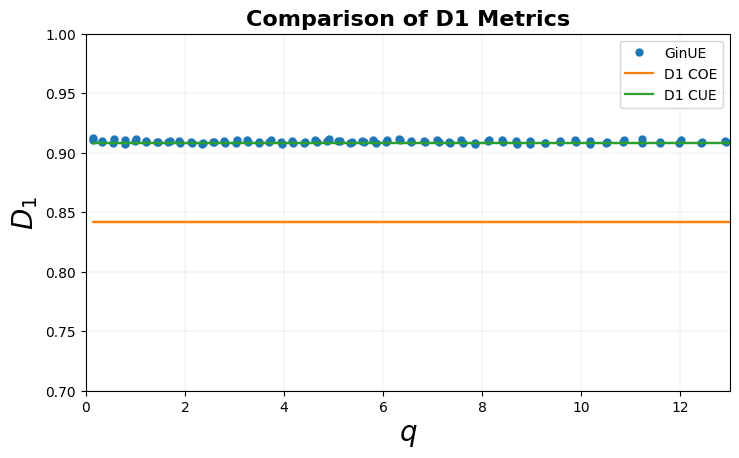

In [25]:
D1data = [(evsum[k] / nens, d1dt[k]) for k in range(dim)]
D1OEth = [(evsum[k] / nens, D1O(dim)) for k in range(dim)]
D1UEth = [(evsum[k] / nens, D1U(dim)) for k in range(dim)]

# Unpacking the data for plotting
x1, y1 = zip(*D1data)
x2, y2 = zip(*D1OEth)
x3, y3 = zip(*D1UEth)

# Plotting
plt.figure(figsize=(7.5, 4.6875))  # Aspect ratio 1/1.6
plt.plot(x1, y1, 'o', label="GinUE", markersize=5)
plt.plot(x2, y2, '-', label="D1 COE",linewidth=1.6)
plt.plot(x3, y3, '-', label="D1 CUE",linewidth=1.6)
plt.legend()
plt.xlim([0, 13])
plt.ylim([0.7, 1])
plt.xlabel(r'$q$', fontsize=20, fontweight='bold')
plt.ylabel(r'$D_1$', fontsize=20, fontweight='bold')
plt.title('Comparison of D1 Metrics', fontsize=16, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tight_layout()
plt.show()

In [26]:
D2data = [(evsum[k] / nens, dqdt[k]) for k in range(dim)]
D2OEth = [(evsum[k] / nens, -1 / (q - 1) * np.log(J1(dim, q)) / np.log(dim)) for k in range(dim)]
D2UEth = [(evsum[k] / nens, -1 / (q - 1) * np.log(J2(dim, q)) / np.log(dim)) for k in range(dim)]

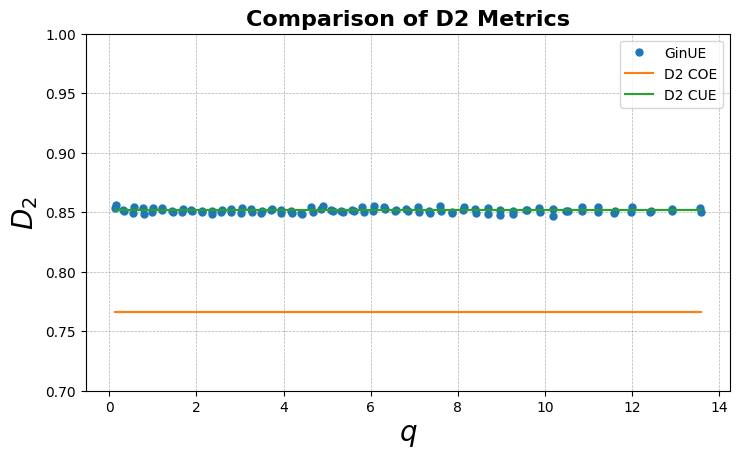

In [28]:
# Unpacking the data for plotting
x1, y1 = zip(*D2data)
x2, y2 = zip(*D2OEth)
x3, y3 = zip(*D2UEth)

# Plotting
plt.figure(figsize=(7.5, 4.6875))  # Aspect ratio 1/1.6
plt.plot(x1, y1, 'o', label="GinUE", markersize=5)
plt.plot(x2, y2, '-', label="D2 COE")
plt.plot(x3, y3, '-', label="D2 CUE")
plt.legend()
plt.ylim([0.7, 1])
plt.xlabel(r'$q$', fontsize=20, fontweight='bold')
plt.ylabel(r'$D_2$', fontsize=20, fontweight='bold')
plt.title('Comparison of D2 Metrics', fontsize=16, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()